## Regression part a


### 1:

Explain what variable is predicted based on which other variables and what
you hope to accomplish by the regression. Mention your feature transformation
choices such as one-of-K coding. Since we will use regularization momentarily,
apply a feature transformation to your data matrix X such that each column
has mean 0 and standard deviation 1.


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
%store -r data

1. Split your data into features (independent variables) and the target variable (Gross)


In [3]:
X = data.drop("Gross", axis=1)  # Features (indipendent variables)
X = X.drop(columns="title")
y = data["Gross"]  # Target variable (dipendent variable)

In [4]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your feature matrix and transform it
X_scaled = scaler.fit_transform(X)

2. Define a range of values for the regularization parameter λ (alpha) that you want to test.

These values were decided by trying different combinations of them and how the plots were


In [5]:
alphas = [
    # 1e-15,
    # 1e-10,
    # 1e-8,
    # 1e-3,
    # 1e-2,
    1,
    5,
    10,
    20,
    30,
    35,
    40,
    45,
    50,
    55,
    100,
    110,
    120,
    125,
    130,
    135,
    150,
    170,
    190,
    200,
    220,
    250,
    300,
    400,
    450,
    500,
    550,
    600,
    650,
    700,
    750,
    800,
    900,
    1000,
    2000,
    3000,
    4000,
    5000,
    6000,
    10000,
    15000,
    20000,
    30000,
    50000,
    70000,
    100000,
    10000000,
]

3. Perform 10-fold cross-validation with Ridge regression for each value of λ


In [6]:
results = {}  # Dictionary to store the results for each α
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(
        ridge, X_scaled, y, cv=kfold, scoring="neg_mean_squared_error"
    )
    results[alpha] = -scores.mean()  # Store the negative mean squared error

4. Find the λ that gives the lowest generalization error


In [7]:
best_alpha = min(results, key=results.get)
best_error = results[best_alpha]
print(f"Best alpha: {best_alpha}")
print(f"Best error: {best_error}")

Best alpha: 40
Best error: 5.019106974351129e+16


In [8]:
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_scaled, y)

Ridge(alpha=40)

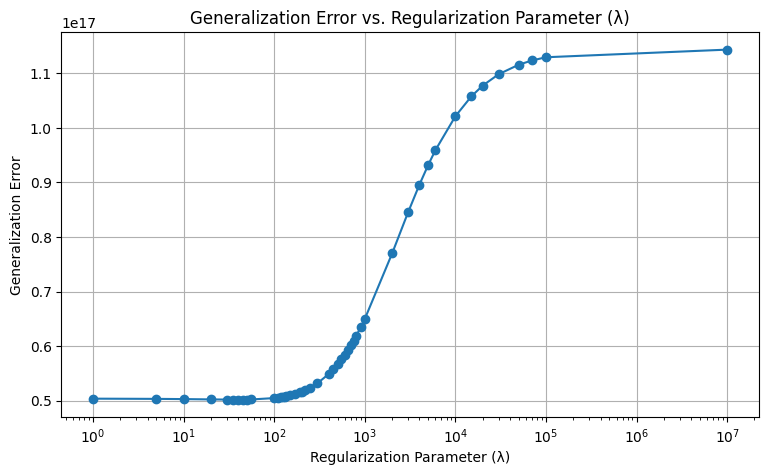

In [9]:
# Extract the alpha values and corresponding errors
alphas = list(results.keys())
errors = [
    results[alpha] for alpha in alphas
]  # Convert back to positive mean squared error

# Plot the generalization error as a function of λ
plt.figure(figsize=(9, 5))
plt.semilogx(alphas, errors, marker="o")
plt.title("Generalization Error vs. Regularization Parameter (λ)")
plt.xlabel("Regularization Parameter (λ)")
plt.xscale("log")
plt.ylabel("Generalization Error")
plt.grid()
plt.show()

Values of coefficients are the weigths for each feature and intercept is the bias term
$$y=(biasterm) + weigths*(features)$$


In [10]:
from sklearn.linear_model import Ridge

# Create and train a Ridge regression model
model = Ridge(alpha=best_alpha)  # Use the best_alpha value you've determined
model.fit(X_scaled, y)  # X is your feature matrix, y is your target variable

# Access the coefficients
coefficients = model.coef_  # Coefficients (weights)
intercept = model.intercept_  # Intercept (bias term)

In [11]:
coefficients

array([-2.86384296e+07, -1.27204007e+07,  1.54307066e+08,  4.91196597e+07,
        3.25162905e+07,  6.35295802e+06,  8.49275118e+07])

In [12]:
intercept

435227473.5511182

This is the plot as 14.2 in the book


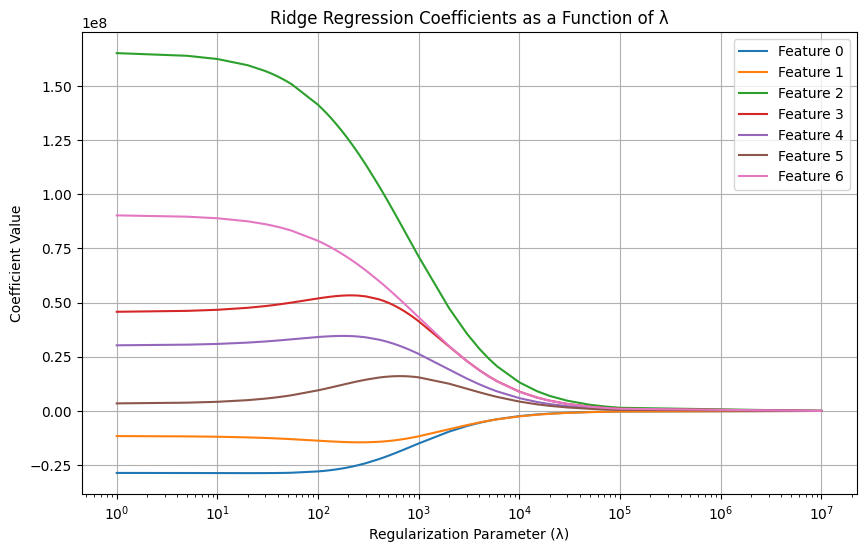

In [13]:
coefficients = []

for alpha in alphas:
    # Create and fit a Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(X_scaled, y)  # Use your transformed data

    # Get the coefficients for this λ
    coef = model.coef_
    coefficients.append(coef)

# Convert coefficients to a NumPy array
coefficients = np.array(coefficients)

# Create a plot to visualize the coefficients
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.semilogx(alphas, coefficients[:, i], label=f"Feature {i}")
plt.title("Ridge Regression Coefficients as a Function of λ")
plt.xlabel("Regularization Parameter (λ)")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid()
plt.show()

## Regression part b


In this section, we will compare three models: the regularized
linear regression model from the previous section, an artificial neural network (ANN) and a baseline.

We are interested in two questions:

- Is one model better than the other?
- Is either model better than a trivial baseline?.

We will attempt to answer
these questions with two-level cross-validation.


### 1 Implement two-level cross-validation

(see algorithm 6 of the lecture notes). We will use 2-level cross-validation to compare the models with K1 = K2 = 10 folds.

As a baseline model, we will apply a linear regression model with no features, i.e. it computes the mean of y on the training data, and use this value to predict y on the test data.

Make sure you can fit an ANN model to the data.

As complexity-controlling parameter for the ANN, we will use the number of hidden units5 h.
Based on a few test-runs, select a reasonable range of values for h (which should include h = 1), and describe the range of values you will use for h and λ.


The baseline model is a simple linear regression model that computes the mean of the target variable (y) on the training data and uses this mean value to predict y on the test data.


In [15]:
from sklearn.model_selection import train_test_split

test_proportion = 0.3

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=test_proportion
)

In [16]:
from sklearn.linear_model import LinearRegression

# Create the baseline model
baseline_model = LinearRegression()

# Fit the model to the mean of the training target variable
baseline_model.fit(X_train, y_train)

# Make predictions using the trained baseline model
baseline_predictions = baseline_model.predict(X_test)

For the ANN model, you need to set up a range of values for the number of hidden units (h) and the regularization parameter (λ).


In [17]:
# Define a range of values for hidden units (h)
hidden_units_range = [1, 10, 20, 30, 40, 50]

# Define a range of values for the regularization parameter (λ)
lambda_range = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]